# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [80]:
import pandas as pd
import numpy as np

airbnb = pd.read_csv('/workspace/data/airbnb_NYC.csv', encoding='latin1')

airbnb["Price"] = (
    airbnb["Price"]
    .astype(str) # Convert to string to ensure we can use str.replace
    .str.replace(",", "") # Remove commas
    .astype(float) # Convert to float after removing commas
)

airbnb["Price"].isna().sum()

np.int64(0)

In [81]:
police = pd.read_csv('/workspace/data/mn_police_use_of_force.csv')

police['subject_injury'].isna().mean()

police["subject_injury"].unique()

police["subject_injury"] = police["subject_injury"].fillna("Missing")

pd.crosstab(police["subject_injury"], police["force_type"])

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
Missing,2,7051,1421,0,27,74,87,0,170,31,985
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172


In [82]:
metabric = pd.read_csv('/workspace/data/metabric.csv')

metabric['Overall Survival Status'] = metabric['Overall Survival Status'].map({'0:LIVING':1, '1:DECEASED':0})

metabric.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,1,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,0,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,1,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,0,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,0,YES,5.230071,31.0,4.0


In [83]:
airbnb["Review Scores Rating"].isna().sum()
median_val = airbnb["Review Scores Rating"].median()

airbnb["Review Scores Rating Imputed"] = (
    airbnb["Review Scores Rating"].fillna(median_val)
)
airbnb.head()

#This might cause bias as we are manipulating the data by just attaching a median value. It will lower our variance and it is likely not very accurate to the real review scores.

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating,Review Scores Rating Imputed
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145.0,NaN,94.0
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37.0,NaN,94.0
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28.0,NaN,94.0
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199.0,NaN,94.0
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549.0,96.0,96.0


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [84]:
! pip install xlrd

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [85]:
shark = pd.read_excel("/workspace/undergrad_ml_assignments/data/GSAF5.xls")
shark = shark.drop(columns=['pdf', 'href formula', 'href', 'Case Number', 'Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22'])
shark.head()
# an observation is one specific shark attack event. It affects my choices in cleaning and analyzing data as I need to make sure that each row is unique.


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,Right thigh and lower leg stripped of flesh,Y,?,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,No injury shark knocked man of his board,N,1100hrs,Unknown,Bob Myatt GSAF
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,Puncture wounds to right knee,N,1815hrs,1.7m Seven Gill shark,Bob Myatt GSAF
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,Minor cuts and abrasions,N,0830hrs,Bull shark,Bob Myatt GSAF
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,None reported damage to board,N,1145hrs,Bull shark,Andy Currie


In [86]:
shark["Year"] = pd.to_numeric(shark["Year"], errors="coerce")
shark['Year'].describe()

count    7072.000000
mean     1936.004242
std       270.672015
min         0.000000
25%      1948.000000
50%      1987.000000
75%      2010.000000
max      2026.000000
Name: Year, dtype: float64

In [87]:
shark_recent = shark[shark['Year'] >= 1940]
shark_recent['Year'].describe()
# Attacks seem to be increasing over time as the median is at 2000 meaning that half the attacks are after 2000 (26 years) and half the attacks are from 1940 to 2000 (60 years). 


count    5538.000000
mean     1992.408451
std        24.225247
min      1940.000000
25%      1970.000000
50%      2000.000000
75%      2013.000000
max      2026.000000
Name: Year, dtype: float64

<Axes: >

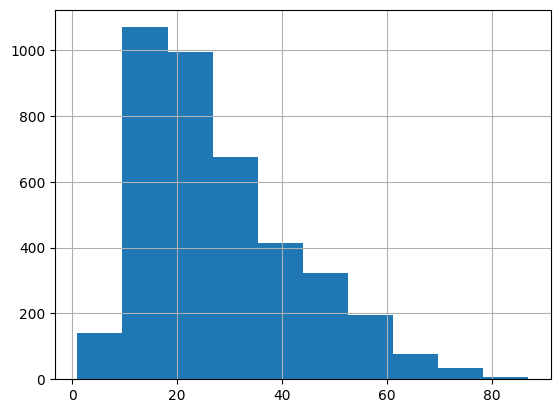

In [88]:
shark["Age"] = pd.to_numeric(shark["Age"], errors="coerce")
shark["Age"].hist()


In [89]:
shark['Type'] = shark['Type'].replace({'Questionable': 'Unknown', 'unprovoked': 'Unprovoked', ' Provoked': 'Provoked', 'Watercraft': 'Provoked', 'Sea Disaster': 'Unprovoked', '?': 'Unknown', 'Unconfirmed': 'Unknown', 'Unverified': 'Unknown', 'Invalid': 'Unknown', 'Under investigation': 'Unknown', 'Boat': 'Provoked', np.nan: 'Unknown'})
shark['Type'].unique()


array(['Unprovoked', 'Provoked', 'Unknown'], dtype=object)

In [90]:
(shark['Type'] == 'Unprovoked').mean()

np.float64(0.7729714447271699)

In [91]:
shark['Fatal Y/N'] = shark['Fatal Y/N'].replace({' N': 'N', 'F': 'UNKNOWN', 'M': 'UNKNOWN', 'Nq': 'N', 'n': 'N', '2017': 'UNKNOWN', 'Y x 2': 'Y', 'y': 'Y', 'N ': 'N', 2017: 'UNKNOWN', np.nan: 'UNKNOWN'})
shark['Fatal Y/N'].unique()

array(['Y', 'N', 'UNKNOWN'], dtype=object)

In [92]:
pd.crosstab(shark['Type'], shark['Fatal Y/N'])
# An attack is more likely to be fatal when it is unprovoked. This makes me surprsised as I thought sharks would be more violent if they were provoked. I guess it has to do with how unprovoked attacks might have been sneak attacks. 

Fatal Y/N,N,UNKNOWN,Y
Type,,,
Provoked,953,21,32
Unknown,43,537,20
Unprovoked,3947,83,1438


**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

1. Making tidy datasets so that data becomes easier to work with
2. It is intended to create a standardized way to tidy up data. With a standard, the time needed to clean and restructure the data will go down.
3. The first sentence means all of the data sets follow the same type of structure while the messy ones are not only messy but they also are messy in different ways, making them even harder to comprehend. The second sentence means that variables and observations are easy to spot when looking at a singular data set but they are hard to universally define across all datasets.
4. Values are individual pieces of data, variables are measurements or characteristics that are recorded, and observations are a complete set of values measured as a single unit.
5. Each variable forms one column, each observation forms one row, and each type of observational unit forms its own table
6. The five most common problems with mess data sets are column headers are values and not variable names, multiple variables are stored in a single column, variables are stored in both rows and columns, multiple types of observational units are stored in one table, and a single observational unit is stored across multiple tables. Table 4 is messy as it has 3 variables, religion, income, and frequency which is not accurately represented in the columns. "Melting" a dataset is pretty much turning a list of columns into a list of rows. This often results in making wide data sets long and tall. 
7. Table 11 is messy because each day of the month (variable) is its own separate column. Table 12 is tidy and "molten" as the day, month, and year is combined into one clean variable called "date."


**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
6. Which giftors provide the most money, in total? 

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64

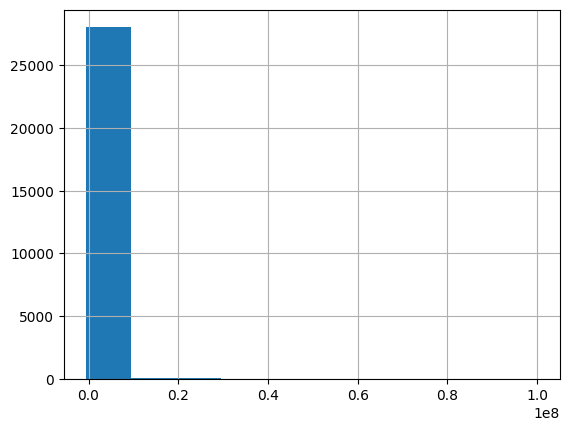

In [ ]:
gifts = pd.read_csv('/workspace/data/ForeignGifts_edu.csv')
gifts.head()
gifts['Foreign Gift Amount'].hist()
gifts['Foreign Gift Amount'].describe()
# This distribution is heavily right skewed

In [105]:
gifts['Gift Type'].value_counts(normalize=True)

Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64

In [117]:
gifts.head()
gifts.groupby('Country of Giftor').size().sort_values(ascending=False).head(15)

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
dtype: int64

In [121]:
gifts.head()
gifts.groupby("Country of Giftor")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15)

Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64

In [ ]:
gifts.head()
gifts.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64

<Axes: >

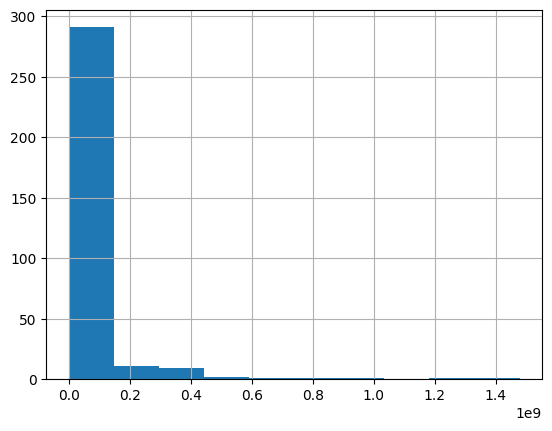

In [125]:
gifts.groupby('Institution Name')['Foreign Gift Amount'].sum().hist()

In [127]:
gifts.head()
gifts.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [ ]:
college = pd.read_csv('/workspace/data/college_completion.csv')
college.head()
pd.crosstab(college['control'], college['level'])
# Private not-for-profit institutions are way more likely to be 4-year institutions that 2-year institutions. Public institutions are more likely to be 2-year institutions but just marginally. Private for-proft institutions are more likely to be 4-year institutions than 2-year institutions but just barely.

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


<Axes: ylabel='Density'>

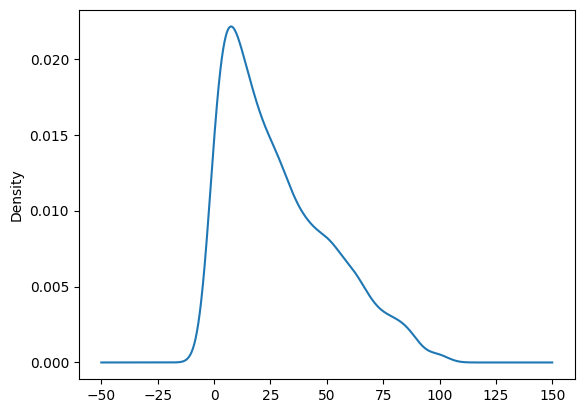

In [ ]:
college['grad_100_value'].plot(kind='kde')

control
Private for-profit        Axes(0.125,0.11;0.775x0.77)
Private not-for-profit    Axes(0.125,0.11;0.775x0.77)
Public                    Axes(0.125,0.11;0.775x0.77)
Name: grad_100_value, dtype: object

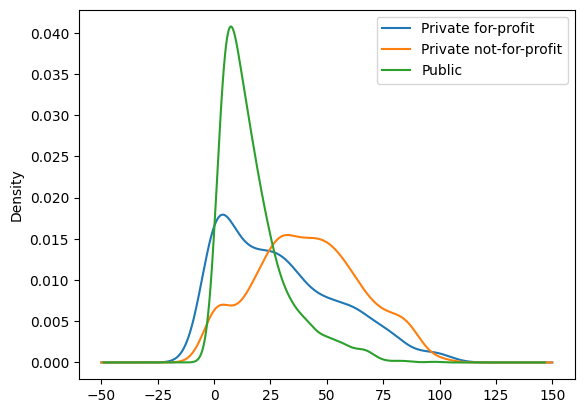

In [ ]:
college.groupby("control")["grad_100_value"].plot(kind="kde", legend=True)
# Private not-for-profit institutions appear to have the most favorable graduation rates

<Axes: xlabel='grad_100_value', ylabel='aid_value'>

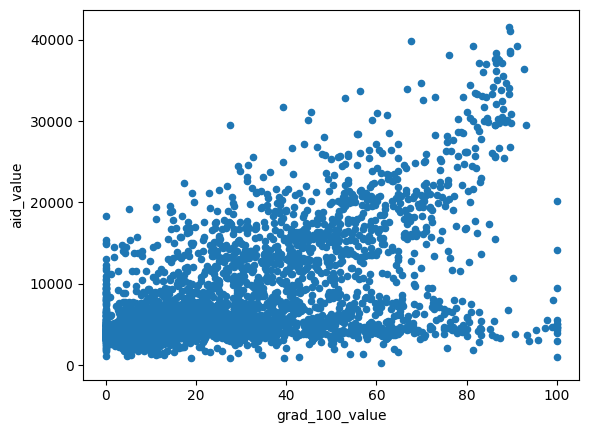

In [153]:
college.plot.scatter( x="grad_100_value", y="aid_value")

In [149]:
college["grad_100_value"].cov(college["aid_value"])

np.float64(88610.48316902434)

In [148]:
college["grad_100_value"].corr(college["aid_value"])

np.float64(0.5758792845936073)

<Axes: xlabel='grad_100_value', ylabel='aid_value'>

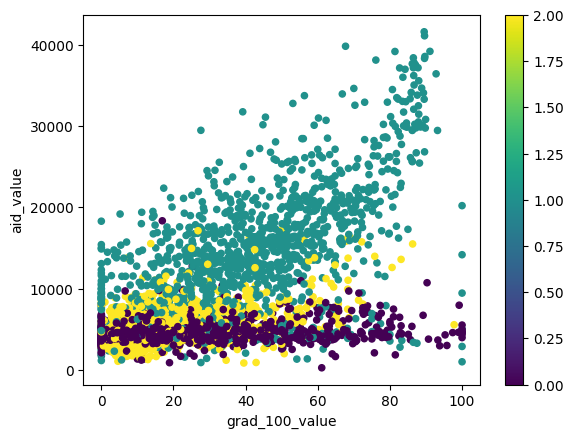

In [ ]:
college.plot.scatter( x="grad_100_value", y="aid_value",c=college["control"].astype("category").cat.codes,colormap="viridis")

In [ ]:
college["control"].astype("category").cat.categories
# Now it is obvious that aid seems to vary positively with graduation rates for private not-for-profit institutions

Index(['Private for-profit', 'Private not-for-profit', 'Public'], dtype='object')

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

1 - 4 done on paper

5. Since multiplying by b preserves order, if med(X) is the middle value, then transforming each observation Y = a + bX keeps ordering intact. Therefore, yes, med(a + bX) = a + bmed(X)

IQR = Q3 - Q1

Q1(a + bX) = a + bQ1(X)
Q3(a + bX) = a + bQ3(X)

IQR(a + bX) = (a + bQ3​) − (a + bQ1​)
=b(Q3​ − Q1​)

IQR(a + bX) = b × IQR(X)

No, IQR(a + bX) does not equal a + b × IQR(X)

6. Let X = {1, 4}

m(X) = 2.5

X^2 = {1, 16}
m(X^2) = 8.5

(m(X))^2 = (2.5)^2=6.25

m(X^2) does not equal (m(X))^2

sqrt(X) = {1, 2}

m(sqrt(X)) = 1.5
sqrt(m(X)) = sqrt(2.5) ~ 1.58

m(sqrt(X)) does not equal sqrt(m(X))

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64

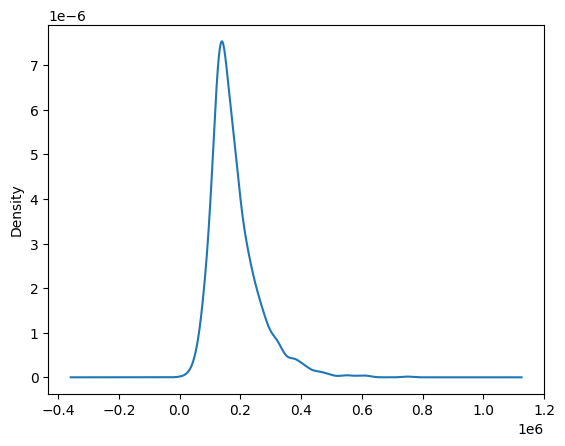

In [175]:
import seaborn as sns
ames = pd.read_csv('/workspace/data/ames_prices.csv')

ames['price'].plot(kind='kde')
ames['price'].describe()

,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,2425.0,184812.041237,82821.802329,12789.0,130000.0,165000.0,220000.0,755000.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,192311.914163,66191.738021,71000.0,145000.0,180000.0,222000.0,392500.0


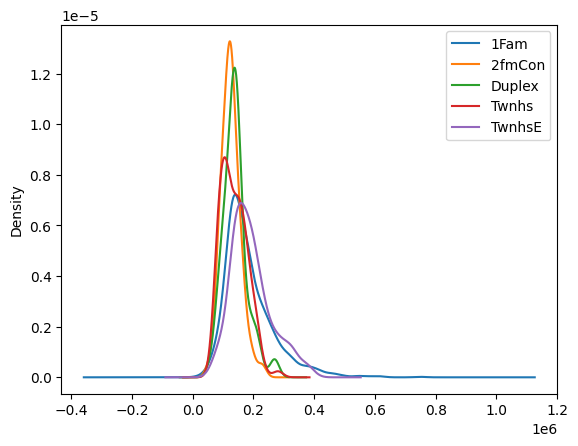

In [174]:
ames.groupby('Bldg.Type')['price'].plot(kind='kde', legend=True)
ames.groupby('Bldg.Type')['price'].describe()

# TwnhsE is the most expensive on average and 1Fam has the highest variation

0.00     12789.0
0.25    129500.0
0.50    160000.0
0.75    213500.0
1.00    755000.0
Name: price, dtype: float64

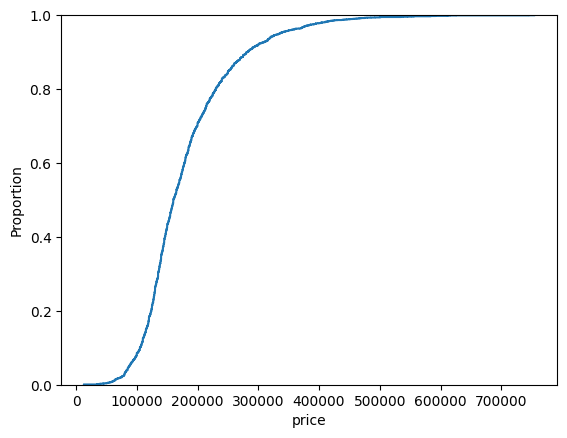

In [178]:
sns.ecdfplot(data=ames, x="price")
ames["price"].quantile([0, 0.25, 0.5, 0.75, 1])


<Axes: xlabel='price'>

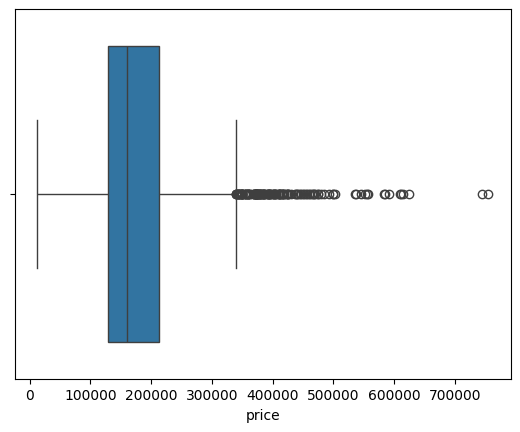

In [ ]:
sns.boxplot(x=ames["price"])
# There are many outliers

<Axes: xlabel='Bldg.Type', ylabel='price'>

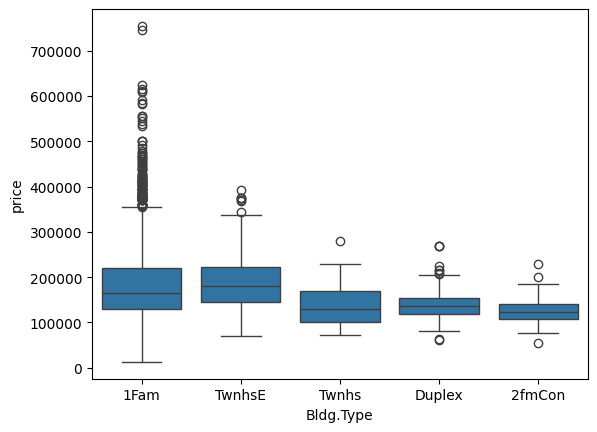

In [ ]:
sns.boxplot(data=ames, x="Bldg.Type", y="price")
#1Fam has the most outliers and the highest variation

In [185]:
Q1 = ames["price"].quantile(0.25)
Q3 = ames["price"].quantile(0.75)
IQR = Q3 - Q1

ames["outlier"] = (
    (ames["price"] < Q1 - 1.5 * IQR) |
    (ames["price"] > Q3 + 1.5 * IQR)
)
ames["outlier"].value_counts()

outlier
False    2793
True      137
Name: count, dtype: int64

count      2930.000000
mean     177632.528669
std       66195.453960
min       87500.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      335000.000000
Name: price_winsor, dtype: float64

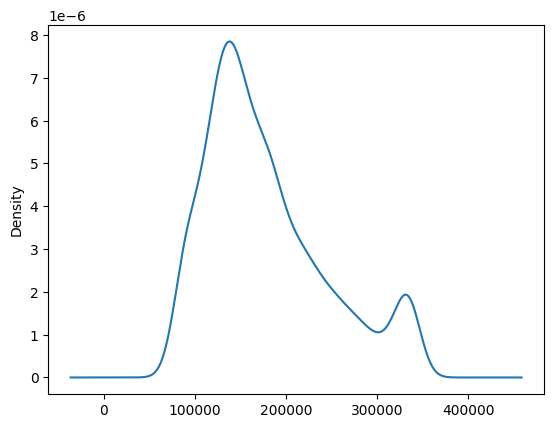

In [ ]:
lower = ames["price"].quantile(0.05)
upper = ames["price"].quantile(0.95)

ames["price_winsor"] = ames["price"].clip(lower, upper)
ames['price_winsor'].plot(kind='kde')

ames['price_winsor'].describe()
# There were many upper outliers that were clipped and now a bump has emerged simply for these outliers.